In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.style
matplotlib.style.use("seaborn")
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sn
sn.color_palette("hls", 17)
import scipy.stats as st
import math

from pingouin import rcorr
import pingouin as pg

In [2]:
import sys
import os

from sys import platform
if platform == "darwin":
    sys.path.append(os.path.dirname(os.path.realpath(__file__)) + "/..")
    smart_nlp_path = ''
elif platform == "win32":
    sys.path.append('../')
    smart_nlp_path = os.getcwd()
    smart_nlp_path = "\\".join([smart_nlp_path.split("\\")[i] for i in range(0,len(smart_nlp_path.split("\\"))-1)]+["/"])

from module.trend_analysis_functions import *
from module.topic_model_plus_class import Topic_Model_plus

In [3]:
incident_file = smart_nlp_path+r"input data\ICS_predictive_model_summaryreps.csv"
incident_summary_df = pd.read_csv(incident_file)
incident_summary_df = incident_summary_df.drop("Unnamed: 0", axis=1)
incident_summary_df = incident_summary_df.loc[incident_summary_df["START_YEAR"]>=2006].reset_index(drop=True)

C:\Users\srandrad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3050: DtypeWarning: Columns (7,13,18,19,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Hazard Metrics

In [4]:
document_id_col = "INCIDENT_ID"
extra_cols = ["CY","DISCOVERY_DATE", "START_YEAR", "REPORT_DOY", "DISCOVERY_DOY",
              "TOTAL_PERSONNEL", "TOTAL_AERIAL", "PCT_CONTAINED_COMPLETED", "Unique_IDs",
              "ACRES",  "WF_FSR", "INJURIES", "FATALITIES", "EST_IM_COST_TO_DATE", "STR_DAMAGED",
              "STR_DESTROYED", "NEW_ACRES", "POO_STATE", "POO_LATITUDE", "POO_LONGITUDE", "WEATHER_CONCERNS_NARR",
              "INC_MGMT_ORG_ABBREV", "EVACUATION_IN_PROGRESS", "Incident_region", "Traffic","Command_Transitions",
              "Evacuations", "Inaccurate_Mapping", "Aerial_Grounding", "Resource_Issues", "Injuries", "Cultural_Resources",
              "Livestock", "Law_Violations", "Military_Base", "Infrastructure",
              "Extreme_Weather", "Ecological", "Hazardous_Terrain", "Floods", "Dry_Weather", "Severity", "NUM_REPORTS", 
              "DAYS_BURING"]

list_of_attributes = ["Combined_Text", "Total_Incident_Text"]
file = file = smart_nlp_path+r"\input data\ICS_predictive_model_sitreps.csv"

ICS = Topic_Model_plus(document_id_col=document_id_col, extra_cols=extra_cols, list_of_attributes=list_of_attributes, combine_cols=False)
ICS.extract_preprocessed_data(file)

C:\Users\srandrad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3242: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Preprocessed data extracted from:  C:\Users\srandrad\smart_nlp\/\input data\ICS_predictive_model_sitreps.csv


In [5]:
preprocessed_df = ICS.data_df
hazard_file = smart_nlp_path+r"\output data\hazard_interpretation_v2.xlsx"

In [6]:
time_of_occurence_days, time_of_occurence_pct_contained, frequency, fires, frequency_fires, categories, hazards, years, ids = calc_metrics(hazard_file, preprocessed_df, rm_outliers=True, target="Combined_Text", unique_ids_col="Unique_IDs")

C:\Users\srandrad\Anaconda3\lib\site-packages\openpyxl\compat\numbers.py:41: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpy.float,
100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [04:43<00:00, 31.45s/it]


In [7]:
table_data = create_primary_results_table(time_of_occurence_days, time_of_occurence_pct_contained, frequency, frequency_fires, preprocessed_df, categories, hazards, years, interval=False)
severity_total, severity_table = calc_severity(fires, incident_summary_df)
pd.DataFrame(table_data)

,Hazard Category,Hazard Name,OTTO days,OTTO %,Average Occurrences per year,Average fires per occurrence,Total Frequency,Total Fire Frequency
0,Mission,Traffic,9.831+-10.889,45.399+-35.27,128.111,7.798,3896,1153
1,Mission,Command Transitions,15.95+-21.251,64.612+-36.433,135.111,7.394,2882,1216
2,Mission,Evacuations,11.109+-12.66,38.31+-32.025,115.556,8.645,3395,1040
3,Mission,Inaccurate Mapping,6.201+-6.422,68.63+-32.711,71.889,13.896,827,647
4,Mission,Aerial Grounding,16.086+-17.537,28.106+-30.373,13.889,71.928,219,125
5,Mission,Resource Issues,10.546+-12.107,35.531+-33.546,92.667,10.781,2218,834
6,Mission,Injuries,9.901+-10.425,58.098+-33.323,61.222,16.318,902,551
7,Wildland Urban Interface,Cultural Resources,8.534+-8.306,49.153+-35.295,22.333,44.731,861,201
8,Wildland Urban Interface,Livestock,8.421+-9.204,35.592+-32.514,30.889,32.342,728,278
9,Wildland Urban Interface,Law Violations,2.128+-6.797,98.367+-11.634,21.111,47.321,196,190


In [8]:
def hazard_histogram(time_of_occurence_pct_contained):
    hist_data = {hazard:[d for year in time_of_occurence_pct_contained[hazard] for d in time_of_occurence_pct_contained[hazard][year]] for hazard in time_of_occurence_pct_contained}
    for hazard in hist_data:
        plt.hist(hist_data[hazard], 20, density=True)
        plt.xlabel('OTTO %')
        plt.ylabel('Probability')
        plt.title(hazard+ 'Histogram of OTTO')
        plt.grid(True)
        plt.show()
def stacked_hazard_histogram(data, label, bins=10, xmax_val=100, xmin_val=0, ymax_val=0.3, ymin_val=0):
    hist_data = {hazard:[d for year in data[hazard] for d in data[hazard][year]] for hazard in data}
    colors = cm.tab20(np.linspace(0, 1, len(data)))
    plt.xlabel(label)
    plt.xlim(xmin_val, xmax_val)
    plt.ylim(ymin_val, ymax_val)
    plt.ylabel('Probability')
    plt.title('Histograms of '+label)
    plt.grid(True)
    i=0
    for hazard in hist_data:
        plt.hist(hist_data[hazard], 20, density=True, facecolor=colors[i], label=hazard)
        i+=1
    plt.legend()
    plt.show()

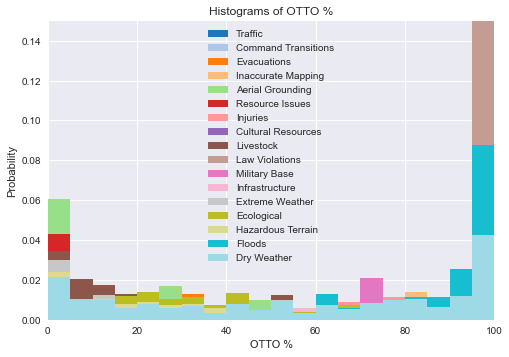

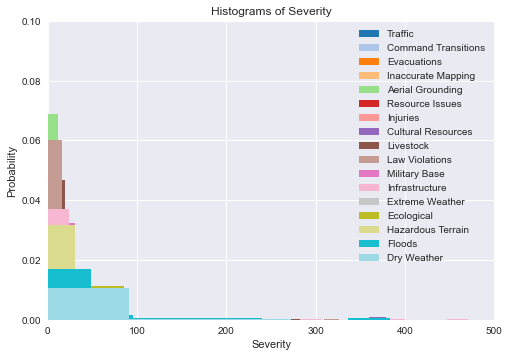

In [9]:
stacked_hazard_histogram(time_of_occurence_pct_contained, label="OTTO %", ymax_val=0.15, ymin_val=0)
stacked_hazard_histogram(severity_total, label="Severity", xmax_val=500, xmin_val=0, ymax_val=0.1,)

## Regional Analysis
Perform entire trend analysis for each of the six(?) regions separately
Identify any significant differences

In [10]:
print(preprocessed_df['Incident_region'].value_counts())
regions_label = preprocessed_df['Incident_region'].value_counts().index
regions_values = preprocessed_df['Incident_region'].value_counts().values
colors = cm.tab10(np.linspace(0, 1, len(regions_label)))

CA      10546
SACC     9154
GBCC     6199
NWCC     4805
NRCC     3644
SWCC     3420
RMCC     3240
AICC     1990
EACC     1262
HICC       83
Name: Incident_region, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

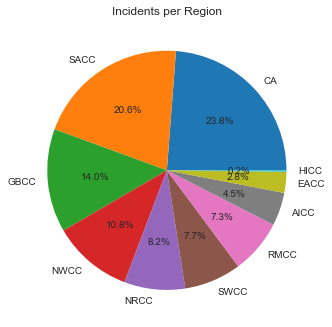

In [11]:
plt.pie(regions_values, labels=regions_label, colors=colors, autopct='%1.1f%%')
plt.title("Incidents per Region")
plt.show

In [12]:
def regional_hazard_histograms(regional_data, label, bins=10, xmax_val=100, xmin_val=0, ymax_val=0.3, ymin_val=0):
    colors = cm.tab10(np.linspace(0, 1, len(regional_data)))
    hazard_focused_dict = {}
    regions = [region for region in regional_data]
    hazards = [hazard for hazard in regional_data[regions[0]][label]]
    #hazard_focused_dict = {hazard:{region:[d for year in regional_data[region][label][hazard] for d in regional_data[region][label][hazard][year]]} for hazard in hazards for region in regions}
    hazard_focused_dict = {hazard:{region:[] for region in regions} for hazard in hazards}
    for hazard in hazards:
        for region in regions:
            data = []
            for year in regional_data[region][label][hazard]:
                for d in regional_data[region][label][hazard][year]:
                    data.append(d)
            #data = [d for year in regional_data[region][label][hazard] for d in regional_data[region][label][hazard][year]]
            hazard_focused_dict[hazard][region] = data
    #print(hazard_focused_dict)
    for hazard in hazard_focused_dict:
        colors = cm.tab10(np.linspace(0, 1, len(regional_data)))
        plt.xlim(xmin_val, xmax_val)
        plt.ylim(ymin_val, ymax_val)
        plt.xlabel(label)
        plt.ylabel('Probability')
        plt.title('Histograms of '+hazard+" "+label)
        plt.grid(True)
        i=0
        for region in hazard_focused_dict[hazard]:
            #print(hazard_focused_dict[hazard][region])
            plt.hist(hazard_focused_dict[hazard][region], bins, density=True, facecolor=colors[i], label=region)
            i+=1
        plt.legend()
        plt.show()
    return hazard_focused_dict

### Metrics

In [13]:
regions = {'AICC':['AK'],
          'EACC':['MN', 'IA', 'WI', 'IL', 'IN', 'MO', 'MI', 'OH', 'WV', 'PA',
                 'NY', 'VT', 'NH', 'ME', 'MA', 'RI', 'CT', 'NJ', 'DE', 'MD'],
          'GBCC':['NV', 'UT', {'ID':["46n"]}],
           'SACC': [{'TX':["100w"]}, 'OK', 'AR', 'LA', 'MS', 'AL', 'GA', 'FL', 'SC', 'NC',
                   'TN', 'KY', 'VA'],
           'NWCC': ['OR','WA'],
           'CA':['CA'], #OSCC and ONCC about 38 N
           'NRCC':['MT', 'ND', {'ID':["46n"]}],
           'RMCC':['CO', 'WY', 'SD', 'KS', 'NE'],
           'SWCC':['NM', 'AZ', {'TX':["100w"]}],
           'HICC':['HI']
          }
regional_data = {}
for region in regions:
    print(region)
    regional_data[region] = {}
    region_df = preprocessed_df.loc[preprocessed_df['Incident_region']==region].reset_index(drop=True)
    time_of_occurence_days, time_of_occurence_pct_contained, frequency, fires_, frequency_fires, categories, hazards, years, ids = calc_metrics(hazard_file, region_df, rm_outliers=True, target="Combined_Text", unique_ids_col="Unique_IDs")
    regional_data[region]['OTTO days'] = time_of_occurence_days
    regional_data[region]['OTTO pct'] = time_of_occurence_pct_contained
    regional_data[region]['frequency'] = frequency
    regional_data[region]['fires'] = fires_
    regional_data[region]['frequency fires'] = frequency_fires
    table_data = create_primary_results_table(time_of_occurence_days, time_of_occurence_pct_contained, frequency, frequency_fires, region_df, categories, hazards, years, interval=False)
    severity_total, severity_table = calc_severity(fires_, incident_summary_df)
    regional_data[region]['table data'] = table_data
    regional_data[region]['severity data'] = severity_total
    display(pd.DataFrame(table_data))
    display(severity_table)

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

AICC


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:12<00:00,  1.39s/it]
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
..\module\trend

Error in calculation:
{'OTTO days': {'Traffic': [2008.0], 'Evacuations': [2008.0, 2010.0], 'Aerial Grounding': [2006.0, 2007.0, 2008.0, 2012.0], 'Resource Issues': [2012.0], 'Injuries': [2008.0, 2014.0], 'Cultural Resources': [2006.0, 2007.0, 2008.0, 2011.0, 2012.0, 2014.0], 'Livestock': [2007.0, 2012.0, 2014.0], 'Law Violations': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Military Base': [2006.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2014.0], 'Infrastructure': [2006.0, 2007.0, 2008.0, 2010.0, 2011.0, 2012.0, 2013.0], 'Extreme Weather': [2006.0], 'Ecological': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Floods': [2008.0, 2009.0, 2010.0, 2012.0, 2013.0, 2014.0], 'Dry Weather': [2008.0]}, 'OTTO pct': {'Traffic': [2008.0], 'Evacuations': [2008.0, 2010.0], 'Aerial Grounding': [2006.0, 2007.0, 2008.0, 2012.0], 'Resource Issues': [2012.0], 'Injuries': [2008.0, 2014.0], 'Cultural Resources': [2006.0, 2007.0, 2008.0, 2011.0, 2012

,Hazard Category,Hazard Name,OTTO days,OTTO %,Average Occurrences per year,Average fires per occurrence,Total Frequency,Total Fire Frequency
0,Mission,Traffic,21.07+-18.256,36469.558+-120083.473,2.111,12.474,100,19
1,Mission,Command Transitions,18.09+-18.723,54.447+-34.659,5.667,4.647,103,51
2,Mission,Evacuations,16.88+-13.967,7.372+-12.92,2.889,9.115,88,26
3,Mission,Inaccurate Mapping,19.953+-18.285,10329.667+-65927.566,3.778,6.971,44,34
4,Mission,Aerial Grounding,27.105+-17.829,21.632+-25.762,1.222,21.545,19,11
5,Mission,Resource Issues,21.952+-19.474,18.726+-28.828,4.111,6.405,86,37
6,Mission,Injuries,15.037+-11.877,38.185+-30.393,2.111,12.474,27,19
7,Wildland Urban Interface,Cultural Resources,17.515+-12.735,33.471+-22.769,0.556,47.400,34,5
8,Wildland Urban Interface,Livestock,11.714+-10.043,11.81+-18.523,1.222,21.545,21,11
9,Wildland Urban Interface,Law Violations,nan+-nan,nan+-nan,0.000,inf,0,0


,Hazard,Average Severity,std dev Severity,n total,n after outliers,formatted
0,Traffic,1.667,1.445,19,15,1.667+-1.445
1,Command Transitions,3.396,4.667,51,48,3.396+-4.667
2,Evacuations,6.360,7.036,26,25,6.36+-7.036
3,Inaccurate Mapping,3.419,4.777,34,31,3.419+-4.777
4,Aerial Grounding,2.100,2.166,11,10,2.1+-2.166
5,Resource Issues,1.000,1.244,37,31,1.0+-1.244
6,Injuries,7.111,7.007,19,18,7.111+-7.007
7,Cultural Resources,3.200,3.059,5,5,3.2+-3.059
8,Livestock,5.000,7.127,11,10,5.0+-7.127
9,Law Violations,NaN,NaN,0,0,nan+-nan


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

EACC


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.11it/s]
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
..\module\trend

Error in calculation:
{'OTTO days': {'Traffic': [2014.0], 'Command Transitions': [2010.0], 'Evacuations': [2008.0], 'Inaccurate Mapping': [2006.0, 2009.0, 2013.0, 2014.0], 'Aerial Grounding': [2007.0, 2008.0, 2009.0, 2012.0, 2013.0, 2014.0], 'Resource Issues': [2009.0, 2014.0], 'Injuries': [2013.0], 'Cultural Resources': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2013.0, 2014.0], 'Livestock': [2006.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Law Violations': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Military Base': [2009.0, 2010.0, 2011.0, 2012.0, 2013.0], 'Infrastructure': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2014.0], 'Extreme Weather': [2008.0], 'Ecological': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Hazardous Terrain': [2014.0], 'Floods': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Dry Weather': [2014.0]}, 'OTTO pct': {'Traffic': [2014.0], 'Command Tran

,Hazard Category,Hazard Name,OTTO days,OTTO %,Average Occurrences per year,Average fires per occurrence,Total Frequency,Total Fire Frequency
0,Mission,Traffic,15.25+-21.927,69.22+-33.96,4.000,16.444,50,36
1,Mission,Command Transitions,13.217+-10.756,73.545+-34.267,2.667,24.667,47,24
2,Mission,Evacuations,12.875+-14.662,48.429+-34.568,2.889,22.769,49,26
3,Mission,Inaccurate Mapping,8.733+-16.014,85.4+-20.139,1.667,39.467,15,15
4,Mission,Aerial Grounding,13.667+-8.957,43998.333+-49116.284,0.556,118.400,9,5
5,Mission,Resource Issues,6.515+-10.04,12045.0+-32261.614,2.000,32.889,33,18
6,Mission,Injuries,14.229+-23.661,86.971+-27.229,2.889,22.769,35,26
7,Wildland Urban Interface,Cultural Resources,7.6+-5.024,88.5+-29.669,0.222,296.000,10,2
8,Wildland Urban Interface,Livestock,1.0+-0.0,100.0+-0.0,0.111,592.000,1,1
9,Wildland Urban Interface,Law Violations,nan+-nan,nan+-nan,0.000,inf,0,0


,Hazard,Average Severity,std dev Severity,n total,n after outliers,formatted
0,Traffic,0.467,0.991,36,30,0.467+-0.991
1,Command Transitions,1.143,1.726,24,21,1.143+-1.726
2,Evacuations,4.217,5.718,26,23,4.217+-5.718
3,Inaccurate Mapping,4.308,5.743,15,13,4.308+-5.743
4,Aerial Grounding,0.750,1.299,5,4,0.75+-1.299
5,Resource Issues,0.867,1.586,18,15,0.867+-1.586
6,Injuries,1.174,0.761,26,23,1.174+-0.761
7,Cultural Resources,1.000,1.000,2,2,1.0+-1.0
8,Livestock,NaN,NaN,1,0,nan+-nan
9,Law Violations,NaN,NaN,0,0,nan+-nan


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

GBCC


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:40<00:00,  4.51s/it]
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
..\module\trend

Error in calculation:
{'OTTO days': {'Aerial Grounding': [2008.0, 2009.0], 'Resource Issues': [2014.0], 'Cultural Resources': [2009.0], 'Livestock': [2014.0], 'Law Violations': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Military Base': [2006.0, 2007.0, 2008.0, 2009.0, 2014.0], 'Infrastructure': [2009.0, 2014.0], 'Ecological': [2014.0], 'Floods': [2010.0, 2011.0]}, 'OTTO pct': {'Aerial Grounding': [2008.0, 2009.0], 'Resource Issues': [2014.0], 'Cultural Resources': [2009.0], 'Livestock': [2014.0], 'Law Violations': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Military Base': [2006.0, 2007.0, 2008.0, 2009.0, 2014.0], 'Infrastructure': [2009.0, 2014.0], 'Ecological': [2014.0], 'Floods': [2010.0, 2011.0]}, 'frequency days': {}, 'frequency pct': {}}


,Hazard Category,Hazard Name,OTTO days,OTTO %,Average Occurrences per year,Average fires per occurrence,Total Frequency,Total Fire Frequency
0,Mission,Traffic,8.998+-11.264,36.491+-34.564,22.222,6.205,555,200
1,Mission,Command Transitions,9.222+-8.072,56.916+-40.819,23.556,5.854,409,212
2,Mission,Evacuations,10.884+-12.539,28.105+-29.095,18.889,7.300,483,170
3,Mission,Inaccurate Mapping,4.358+-3.9,1104.558+-9662.863,13.667,10.089,148,123
4,Mission,Aerial Grounding,17.591+-16.012,28.0+-34.143,2.111,65.316,45,19
5,Mission,Resource Issues,9.639+-13.282,842.446+-9080.995,20.444,6.745,474,184
6,Mission,Injuries,8.847+-11.118,718.719+-7712.795,10.333,13.344,138,93
7,Wildland Urban Interface,Cultural Resources,11.791+-14.834,1829.732+-14062.087,4.444,31.025,132,40
8,Wildland Urban Interface,Livestock,6.296+-6.462,39.387+-32.984,11.000,12.535,284,99
9,Wildland Urban Interface,Law Violations,nan+-nan,nan+-nan,0.000,inf,0,0


,Hazard,Average Severity,std dev Severity,n total,n after outliers,formatted
0,Traffic,1.474,2.113,200,175,1.474+-2.113
1,Command Transitions,1.720,2.288,212,182,1.72+-2.288
2,Evacuations,2.381,2.956,170,147,2.381+-2.956
3,Inaccurate Mapping,0.748,1.147,123,103,0.748+-1.147
4,Aerial Grounding,3.438,4.242,19,16,3.438+-4.242
5,Resource Issues,1.407,2.136,184,162,1.407+-2.136
6,Injuries,5.000,5.182,93,80,5.0+-5.182
7,Cultural Resources,2.556,3.023,40,36,2.556+-3.023
8,Livestock,1.795,2.360,99,88,1.795+-2.36
9,Law Violations,NaN,NaN,0,0,nan+-nan


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

SACC


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:58<00:00,  6.51s/it]


Error in calculation:
{'OTTO days': {'Evacuations': [2014.0], 'Aerial Grounding': [2009.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Cultural Resources': [2010.0, 2013.0, 2014.0], 'Livestock': [2010.0, 2013.0, 2014.0], 'Law Violations': [2014.0], 'Military Base': [2007.0], 'Infrastructure': [2010.0, 2012.0, 2014.0], 'Ecological': [2010.0, 2014.0], 'Floods': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2012.0, 2013.0, 2014.0]}, 'OTTO pct': {'Evacuations': [2014.0], 'Aerial Grounding': [2009.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Cultural Resources': [2010.0, 2013.0, 2014.0], 'Livestock': [2010.0, 2013.0, 2014.0], 'Law Violations': [2014.0], 'Military Base': [2007.0], 'Infrastructure': [2010.0, 2012.0, 2014.0], 'Ecological': [2010.0, 2014.0], 'Floods': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2012.0, 2013.0, 2014.0]}, 'frequency days': {}, 'frequency pct': {}}


C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Hazard Category,Hazard Name,OTTO days,OTTO %,Average Occurrences per year,Average fires per occurrence,Total Frequency,Total Fire Frequency
0,Mission,Traffic,7.444+-13.261,68.788+-32.476,21.778,16.500,424,196
1,Mission,Command Transitions,57.037+-61.563,78.755+-15.114,11.778,30.509,333,106
2,Mission,Evacuations,6.119+-9.176,62.426+-32.026,26.667,13.475,456,240
3,Mission,Inaccurate Mapping,7.684+-9.771,85.545+-21.062,11.333,31.706,127,102
4,Mission,Aerial Grounding,10.417+-13.394,43.667+-37.633,1.111,323.400,12,10
5,Mission,Resource Issues,11.821+-18.926,76.168+-27.914,10.000,35.933,146,90
6,Mission,Injuries,11.95+-14.807,81.897+-20.237,8.444,42.553,105,76
7,Wildland Urban Interface,Cultural Resources,6.474+-7.83,62.621+-34.069,2.000,179.667,60,18
8,Wildland Urban Interface,Livestock,5.357+-12.992,55.167+-30.235,2.667,134.750,30,24
9,Wildland Urban Interface,Law Violations,1.603+-6.231,98.307+-11.843,20.778,17.294,189,187


,Hazard,Average Severity,std dev Severity,n total,n after outliers,formatted
0,Traffic,0.561,1.021,196,171,0.561+-1.021
1,Command Transitions,1.054,1.664,106,92,1.054+-1.664
2,Evacuations,1.038,1.574,240,209,1.038+-1.574
3,Inaccurate Mapping,0.506,1.016,102,87,0.506+-1.016
4,Aerial Grounding,0.750,0.968,10,8,0.75+-0.968
5,Resource Issues,0.413,0.911,90,75,0.413+-0.911
6,Injuries,2.386,2.106,76,70,2.386+-2.106
7,Cultural Resources,0.824,1.150,18,17,0.824+-1.15
8,Livestock,0.526,0.881,24,19,0.526+-0.881
9,Law Violations,1.047,0.791,187,172,1.047+-0.791


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

NWCC


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:31<00:00,  3.45s/it]
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
..\module\trend

Error in calculation:
{'OTTO days': {'Aerial Grounding': [2007.0, 2008.0, 2009.0], 'Law Violations': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Military Base': [2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Infrastructure': [2010.0, 2014.0], 'Ecological': [2007.0, 2008.0], 'Floods': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0]}, 'OTTO pct': {'Aerial Grounding': [2007.0, 2008.0, 2009.0], 'Law Violations': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Military Base': [2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Infrastructure': [2010.0, 2014.0], 'Ecological': [2007.0, 2008.0], 'Floods': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0]}, 'frequency days': {}, 'frequency pct': {}}


,Hazard Category,Hazard Name,OTTO days,OTTO %,Average Occurrences per year,Average fires per occurrence,Total Frequency,Total Fire Frequency
0,Mission,Traffic,11.701+-11.379,40.869+-34.332,16.333,4.347,590,147
1,Mission,Command Transitions,13.504+-12.121,64.29+-36.069,26.556,2.674,551,239
2,Mission,Evacuations,12.788+-14.934,33.634+-27.942,12.889,5.509,444,116
3,Mission,Inaccurate Mapping,10.854+-12.521,289.26+-1660.978,9.000,7.889,110,81
4,Mission,Aerial Grounding,9.389+-10.547,21.944+-17.678,1.444,49.154,18,13
5,Mission,Resource Issues,14.682+-20.338,138.059+-1270.941,11.889,5.972,268,107
6,Mission,Injuries,16.979+-16.552,47.747+-29.499,6.778,10.475,95,61
7,Wildland Urban Interface,Cultural Resources,7.33+-11.466,41.731+-35.533,3.222,22.034,105,29
8,Wildland Urban Interface,Livestock,7.328+-8.575,36.5+-33.454,2.778,25.560,58,25
9,Wildland Urban Interface,Law Violations,nan+-nan,nan+-nan,0.000,inf,0,0


,Hazard,Average Severity,std dev Severity,n total,n after outliers,formatted
0,Traffic,1.859,2.294,147,135,1.859+-2.294
1,Command Transitions,1.680,2.082,239,219,1.68+-2.082
2,Evacuations,2.648,2.895,116,105,2.648+-2.895
3,Inaccurate Mapping,1.649,1.920,81,74,1.649+-1.92
4,Aerial Grounding,3.000,2.697,13,11,3.0+-2.697
5,Resource Issues,1.918,2.253,107,98,1.918+-2.253
6,Injuries,3.943,2.666,61,53,3.943+-2.666
7,Cultural Resources,2.667,3.006,29,27,2.667+-3.006
8,Livestock,3.682,3.308,25,22,3.682+-3.308
9,Law Violations,NaN,NaN,0,0,nan+-nan


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

CA


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:08<00:00,  7.59s/it]


Error in calculation:
{'OTTO days': {'Aerial Grounding': [2009.0, 2010.0], 'Law Violations': [2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0], 'Military Base': [2006.0, 2008.0, 2011.0, 2014.0], 'Ecological': [2010.0, 2011.0], 'Floods': [2007.0, 2009.0, 2010.0, 2011.0]}, 'OTTO pct': {'Aerial Grounding': [2009.0, 2010.0], 'Law Violations': [2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0], 'Military Base': [2006.0, 2008.0, 2011.0, 2014.0], 'Ecological': [2010.0, 2011.0], 'Floods': [2007.0, 2009.0, 2010.0, 2011.0]}, 'frequency days': {}, 'frequency pct': {}}


,Hazard Category,Hazard Name,OTTO days,OTTO %,Average Occurrences per year,Average fires per occurrence,Total Frequency,Total Fire Frequency
0,Mission,Traffic,11.046+-11.552,47.768+-33.084,30.333,3.963,1423,273
1,Mission,Command Transitions,15.028+-17.129,75.22+-32.163,25.222,4.767,720,227
2,Mission,Evacuations,12.896+-13.694,39.711+-28.762,25.111,4.788,1188,226
3,Mission,Inaccurate Mapping,10.575+-20.602,75.988+-27.678,14.556,8.260,192,131
4,Mission,Aerial Grounding,25.836+-24.51,45.377+-33.8,2.222,54.100,55,20
5,Mission,Resource Issues,12.402+-13.106,39.14+-32.57,20.111,5.978,724,181
6,Mission,Injuries,9.718+-10.114,59.777+-49.677,14.556,8.260,291,131
7,Wildland Urban Interface,Cultural Resources,9.061+-9.437,51.036+-34.839,5.667,21.216,278,51
8,Wildland Urban Interface,Livestock,11.855+-11.6,26.899+-25.823,4.778,25.163,175,43
9,Wildland Urban Interface,Law Violations,16.286+-6.135,100.0+-0.0,0.333,360.667,7,3


,Hazard,Average Severity,std dev Severity,n total,n after outliers,formatted
0,Traffic,4.571,5.964,273,231,4.571+-5.964
1,Command Transitions,6.268,7.745,227,194,6.268+-7.745
2,Evacuations,8.272,10.819,226,191,8.272+-10.819
3,Inaccurate Mapping,4.946,6.539,131,111,4.946+-6.539
4,Aerial Grounding,11.176,14.325,20,17,11.176+-14.325
5,Resource Issues,4.903,6.209,181,154,4.903+-6.209
6,Injuries,8.973,10.314,131,113,8.973+-10.314
7,Cultural Resources,5.341,5.372,51,41,5.341+-5.372
8,Livestock,7.378,8.933,43,37,7.378+-8.933
9,Law Violations,200.000,120.850,3,3,200.0+-120.85


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

NRCC


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:23<00:00,  2.65s/it]
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
..\module\trend

Error in calculation:
{'OTTO days': {'Evacuations': [2009.0, 2010.0], 'Aerial Grounding': [2009.0, 2010.0, 2011.0], 'Injuries': [2010.0, 2011.0], 'Cultural Resources': [2008.0, 2014.0], 'Livestock': [2009.0, 2014.0], 'Law Violations': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Military Base': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2013.0, 2014.0], 'Infrastructure': [2008.0, 2009.0, 2010.0, 2011.0, 2014.0], 'Ecological': [2007.0, 2008.0, 2009.0, 2010.0, 2012.0, 2013.0, 2014.0], 'Floods': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Dry Weather': [2009.0, 2014.0]}, 'OTTO pct': {'Evacuations': [2009.0, 2010.0], 'Aerial Grounding': [2009.0, 2010.0, 2011.0], 'Injuries': [2010.0, 2011.0], 'Cultural Resources': [2008.0, 2014.0], 'Livestock': [2009.0, 2014.0], 'Law Violations': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Military Base': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2013.0,

,Hazard Category,Hazard Name,OTTO days,OTTO %,Average Occurrences per year,Average fires per occurrence,Total Frequency,Total Fire Frequency
0,Mission,Traffic,15.735+-16.424,25.945+-32.086,9.667,6.057,276,87
1,Mission,Command Transitions,18.539+-17.086,48.685+-38.987,12.778,4.583,279,115
2,Mission,Evacuations,14.333+-15.744,16.959+-19.004,8.556,6.844,264,77
3,Mission,Inaccurate Mapping,14.44+-16.644,46.365+-39.548,4.556,12.854,52,41
4,Mission,Aerial Grounding,14.423+-12.245,8975.577+-44809.289,1.889,31.000,26,17
5,Mission,Resource Issues,17.193+-17.805,28.588+-28.604,9.000,6.506,230,81
6,Mission,Injuries,13.938+-11.746,41.18+-34.595,4.111,14.243,51,37
7,Wildland Urban Interface,Cultural Resources,13.202+-12.212,40.667+-33.393,1.778,32.938,102,16
8,Wildland Urban Interface,Livestock,16.069+-13.235,34.7+-36.08,2.556,22.913,61,23
9,Wildland Urban Interface,Law Violations,nan+-nan,nan+-nan,0.000,inf,0,0


,Hazard,Average Severity,std dev Severity,n total,n after outliers,formatted
0,Traffic,1.573,2.281,87,75,1.573+-2.281
1,Command Transitions,2.277,2.718,115,101,2.277+-2.718
2,Evacuations,3.441,4.031,77,68,3.441+-4.031
3,Inaccurate Mapping,1.316,1.851,41,38,1.316+-1.851
4,Aerial Grounding,4.133,4.256,17,15,4.133+-4.256
5,Resource Issues,2.250,2.454,81,72,2.25+-2.454
6,Injuries,2.533,1.477,37,30,2.533+-1.477
7,Cultural Resources,3.188,3.414,16,16,3.188+-3.414
8,Livestock,3.050,3.383,23,20,3.05+-3.383
9,Law Violations,NaN,NaN,0,0,nan+-nan


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

RMCC


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:21<00:00,  2.34s/it]
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
..\module\trend

Error in calculation:
{'OTTO days': {'Command Transitions': [2014.0], 'Evacuations': [2009.0], 'Inaccurate Mapping': [2014.0], 'Aerial Grounding': [2009.0, 2014.0], 'Cultural Resources': [2006.0, 2008.0, 2009.0, 2011.0, 2014.0], 'Livestock': [2010.0, 2011.0, 2014.0], 'Law Violations': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Military Base': [2006.0, 2007.0, 2009.0, 2010.0, 2013.0, 2014.0], 'Ecological': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2013.0, 2014.0], 'Hazardous Terrain': [2014.0], 'Floods': [2006.0, 2007.0, 2009.0, 2011.0, 2014.0], 'Dry Weather': [2009.0, 2014.0]}, 'OTTO pct': {'Command Transitions': [2014.0], 'Evacuations': [2009.0], 'Inaccurate Mapping': [2014.0], 'Aerial Grounding': [2009.0, 2014.0], 'Cultural Resources': [2006.0, 2008.0, 2009.0, 2011.0, 2014.0], 'Livestock': [2010.0, 2011.0, 2014.0], 'Law Violations': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Military Base': [2006.0, 2007.0, 2009.0, 2010.0

,Hazard Category,Hazard Name,OTTO days,OTTO %,Average Occurrences per year,Average fires per occurrence,Total Frequency,Total Fire Frequency
0,Mission,Traffic,8.0+-10.853,34334.522+-91138.886,11.444,6.699,252,103
1,Mission,Command Transitions,9.206+-8.425,61.678+-38.899,13.222,5.798,229,119
2,Mission,Evacuations,5.011+-8.29,31.805+-32.735,10.444,7.340,204,94
3,Mission,Inaccurate Mapping,5.23+-6.833,4059.257+-33098.992,7.556,10.147,77,68
4,Mission,Aerial Grounding,7.2+-8.886,27764.133+-103790.337,1.556,49.286,15,14
5,Mission,Resource Issues,8.8+-12.35,3667.104+-34061.03,8.556,8.961,159,77
6,Mission,Injuries,5.027+-8.514,919.117+-7465.367,6.889,11.129,80,62
7,Wildland Urban Interface,Cultural Resources,6.765+-6.647,48.343+-36.011,1.333,57.500,35,12
8,Wildland Urban Interface,Livestock,7.148+-7.44,39.636+-35.175,3.111,24.643,55,28
9,Wildland Urban Interface,Law Violations,nan+-nan,nan+-nan,0.000,inf,0,0


,Hazard,Average Severity,std dev Severity,n total,n after outliers,formatted
0,Traffic,1.933,2.321,103,89,1.933+-2.321
1,Command Transitions,1.515,1.902,119,101,1.515+-1.902
2,Evacuations,2.429,3.398,94,77,2.429+-3.398
3,Inaccurate Mapping,0.611,0.951,68,54,0.611+-0.951
4,Aerial Grounding,0.833,1.143,14,12,0.833+-1.143
5,Resource Issues,1.094,1.902,77,64,1.094+-1.902
6,Injuries,2.964,2.954,62,55,2.964+-2.954
7,Cultural Resources,3.333,4.422,12,9,3.333+-4.422
8,Livestock,1.440,1.899,28,25,1.44+-1.899
9,Law Violations,NaN,NaN,0,0,nan+-nan


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

SWCC


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:21<00:00,  2.43s/it]
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
..\module\trend

Error in calculation:
{'OTTO days': {'Evacuations': [2014.0], 'Aerial Grounding': [2009.0], 'Cultural Resources': [2007.0, 2014.0], 'Livestock': [2010.0], 'Law Violations': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Military Base': [2007.0, 2010.0, 2012.0, 2013.0, 2014.0], 'Infrastructure': [2007.0, 2014.0], 'Ecological': [2010.0, 2013.0, 2014.0], 'Floods': [2007.0, 2008.0, 2009.0, 2010.0, 2012.0, 2014.0]}, 'OTTO pct': {'Evacuations': [2014.0], 'Aerial Grounding': [2009.0], 'Cultural Resources': [2007.0, 2014.0], 'Livestock': [2010.0], 'Law Violations': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0], 'Military Base': [2007.0, 2010.0, 2012.0, 2013.0, 2014.0], 'Infrastructure': [2007.0, 2014.0], 'Ecological': [2010.0, 2013.0, 2014.0], 'Floods': [2007.0, 2008.0, 2009.0, 2010.0, 2012.0, 2014.0]}, 'frequency days': {}, 'frequency pct': {}}


,Hazard Category,Hazard Name,OTTO days,OTTO %,Average Occurrences per year,Average fires per occurrence,Total Frequency,Total Fire Frequency
0,Mission,Traffic,8.227+-9.005,198.308+-633.394,9.556,8.419,211,86
1,Mission,Command Transitions,8.637+-7.073,70.074+-33.716,13.667,5.886,211,123
2,Mission,Evacuations,9.718+-10.29,42.099+-35.412,6.556,12.271,206,59
3,Mission,Inaccurate Mapping,8.333+-10.835,310.75+-1112.888,5.556,14.480,57,50
4,Mission,Aerial Grounding,6.263+-7.1,349.053+-1332.344,1.667,48.267,19,15
5,Mission,Resource Issues,11.602+-13.342,70.244+-309.34,6.444,12.483,96,58
6,Mission,Injuries,11.899+-10.378,56.128+-33.387,5.000,16.089,79,45
7,Wildland Urban Interface,Cultural Resources,11.563+-14.917,51.133+-38.85,3.111,25.857,105,28
8,Wildland Urban Interface,Livestock,6.698+-6.886,326.628+-811.788,2.667,30.167,43,24
9,Wildland Urban Interface,Law Violations,nan+-nan,nan+-nan,0.000,inf,0,0


,Hazard,Average Severity,std dev Severity,n total,n after outliers,formatted
0,Traffic,1.110,1.522,86,73,1.11+-1.522
1,Command Transitions,1.962,2.645,123,106,1.962+-2.645
2,Evacuations,4.000,5.415,59,53,4.0+-5.415
3,Inaccurate Mapping,0.595,1.025,50,42,0.595+-1.025
4,Aerial Grounding,2.154,2.656,15,13,2.154+-2.656
5,Resource Issues,1.837,3.040,58,49,1.837+-3.04
6,Injuries,4.821,6.201,45,39,4.821+-6.201
7,Cultural Resources,4.192,6.108,28,26,4.192+-6.108
8,Livestock,1.286,1.979,24,21,1.286+-1.979
9,Law Violations,NaN,NaN,0,0,nan+-nan


 29%|████████████████████████                                                            | 2/7 [00:00<00:00, 13.20it/s]

HICC


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.89it/s]

Error in calculation:
{'OTTO days': {'Traffic': [2008.0, 2009.0], 'Command Transitions': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0], 'Evacuations': [2006.0, 2008.0, 2009.0], 'Inaccurate Mapping': [2006.0, 2007.0, 2008.0, 2009.0, 2011.0, 2012.0], 'Aerial Grounding': [2006.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0], 'Resource Issues': [2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0], 'Injuries': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0], 'Cultural Resources': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0], 'Livestock': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0], 'Law Violations': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0], 'Military Base': [2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0], 'Infrastructure': [2006.0, 2007.0, 2008.0, 2009.0, 2011.0, 2012.0], 'Extreme Weather': [2006.0, 2008.0], 'Ecological': [2006.0, 2007.0, 2009.0, 2011.0, 2012.0], 'Hazardous Terrain': [2011.0], 'Floods': [2006.0, 2007.0, 2008.0, 2009.0, 20


C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
..\module\trend_analysis_functions.py:574: RuntimeWarning: divide by zero encountered in long_scalars
  data_df["Average fires per occ

,Hazard Category,Hazard Name,OTTO days,OTTO %,Average Occurrences per year,Average fires per occurrence,Total Frequency,Total Fire Frequency
0,Mission,Traffic,5.267+-5.247,29.133+-32.983,0.857,3.167,15,6
1,Mission,Command Transitions,nan+-nan,nan+-nan,0.000,inf,0,0
2,Mission,Evacuations,4.667+-2.981,34.583+-26.336,0.714,3.800,12,5
3,Mission,Inaccurate Mapping,4.0+-1.414,66.0+-13.191,0.286,9.500,5,2
4,Mission,Aerial Grounding,33.0+-0.0,20.0+-0.0,0.143,19.000,1,1
5,Mission,Resource Issues,1.5+-0.5,0.0+-0.0,0.143,19.000,2,1
6,Mission,Injuries,8.0+-0.0,100.0+-0.0,0.143,19.000,1,1
7,Wildland Urban Interface,Cultural Resources,nan+-nan,nan+-nan,0.000,inf,0,0
8,Wildland Urban Interface,Livestock,nan+-nan,nan+-nan,0.000,inf,0,0
9,Wildland Urban Interface,Law Violations,nan+-nan,nan+-nan,0.000,inf,0,0


,Hazard,Average Severity,std dev Severity,n total,n after outliers,formatted
0,Traffic,0.333,0.471,6,6,0.333+-0.471
1,Command Transitions,NaN,NaN,0,0,nan+-nan
2,Evacuations,1.000,1.732,5,4,1.0+-1.732
3,Inaccurate Mapping,0.500,0.500,2,2,0.5+-0.5
4,Aerial Grounding,NaN,NaN,1,0,nan+-nan
5,Resource Issues,NaN,NaN,1,0,nan+-nan
6,Injuries,NaN,NaN,1,0,nan+-nan
7,Cultural Resources,NaN,NaN,0,0,nan+-nan
8,Livestock,NaN,NaN,0,0,nan+-nan
9,Law Violations,NaN,NaN,0,0,nan+-nan


# Hazard predictor analysis

### Predictors
- *TF-IDF of reports
- #of reports so far - manual
- #personnel - TOTAL_PERSONNEL
- #aerial assets - TOTAL_AERIAL
- Acres burned so far - ACRES
- % containment - PCT_CONTAINED_COMPLETED
- Days burning - REPORT_DOY - DISCOVERY_DOY
- *Weather - WEATHER_CONCERNS_NARR
- *Region - POO_STATE/ POO_LATITUDE/POO_LONGITUDE - Categorical
- Spread Rate - WF_FSR
- Injuries, Fatalities - INJURIES, FATALITIES
- Cost -- to date and total predicted -- EST_IM_COST_TO_DATE
- Structures damaged/destroyed -- possibly divide into residential/commercial? - STR_DAMAGED/STR_DESTROYED
- growth - NEW_ACRES
- *Command type - IMT_MGMT_ORG_DESC/INC_MGMT_ORG_ABBREV - Categorical
- *evacuation in progress - EVACUATION_IN_PROGRESS - Categorical

In [14]:
predictor_cols = ['NUM_REPORTS', 'TOTAL_PERSONNEL', 'TOTAL_AERIAL', 'ACRES', 'PCT_CONTAINED_COMPLETED',
                 'DAYS_BURING', 'WF_FSR', 'INJURIES', 'FATALITIES', 'EST_IM_COST_TO_DATE', 'STR_DAMAGED',
                 'STR_DESTROYED', 'NEW_ACRES']

In [15]:
predictor_data = {predictor:[] for predictor in predictor_cols}
for hazard in hazards:
    #print(hazard)
    for predictor in predictor_cols:
        #print(predictor)
        preprocessed_df[predictor] = preprocessed_df[predictor].astype(float)
        aov = pg.anova(dv=predictor, between=hazard.replace(" ", "_"), data=preprocessed_df,
               detailed=True).round(3)
        predictor_data[predictor].append(aov.iloc[0]['p-unc'])
        #print(aov)
predictor_df = pd.DataFrame(predictor_data, index=hazards)
predictor_df

,NUM_REPORTS,TOTAL_PERSONNEL,TOTAL_AERIAL,ACRES,PCT_CONTAINED_COMPLETED,DAYS_BURING,WF_FSR,INJURIES,FATALITIES,EST_IM_COST_TO_DATE,STR_DAMAGED,STR_DESTROYED,NEW_ACRES
Traffic,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.162,0.000,0.000,0.000,0.000,0.000
Command Transitions,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.240,0.000,0.000,0.000,0.000,0.000
Evacuations,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.473,0.000,0.000,0.000,0.000,0.000
Inaccurate Mapping,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.082,0.000,0.000,0.086,0.000,0.000
Aerial Grounding,0.000,0.000,0.0,0.000,0.028,0.0,0.000,0.820,0.000,0.000,0.085,0.315,0.000
Resource Issues,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.158,0.000,0.000,0.053,0.076,0.000
Injuries,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.687,0.000,0.000,0.000,0.000,0.000
Cultural Resources,0.000,0.000,0.0,0.000,0.001,0.0,0.000,0.002,0.000,0.000,0.726,0.000,0.000
Livestock,0.000,0.000,0.0,0.000,0.008,0.0,0.000,0.588,0.000,0.000,0.053,0.003,0.000
Law Violations,0.040,0.003,0.0,0.003,0.331,0.0,0.115,0.897,0.000,0.603,0.000,0.000,0.124


## Predictor: Command Type
since this is a categorical variable, a chi-squared test will be used.
null hypothesis: Hazards occur at the same rate accross command types
alternate hypothesis: hazards occur at different rates for different command types

In [16]:
p_vals = []
for hazard in hazards:
    expected, observed, stats = pg.chi2_independence(preprocessed_df, x='INC_MGMT_ORG_ABBREV', y=hazard.replace(" ", "_"))
    pval = stats.iloc[1]['pval'].round(3)
    p_vals.append(stats.iloc[0]['pval'].round(3))
chi_squared_df = pd.DataFrame({"chi-squared pval": p_vals}, index = hazards)
chi_squared_df

C:\Users\srandrad\Anaconda3\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
C:\Users\srandrad\Anaconda3\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
C:\Users\srandrad\Anaconda3\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
C:\Users\srandrad\Anaconda3\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
C:\Users\srandrad\Anaconda3\lib\site-packages\scipy\stats\stats.py:5991: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\srandrad\Anaconda3\lib\site-packages\scipy\stats\stats.py:5991: RuntimeWarning: i

,chi-squared pval
Traffic,0.0
Command Transitions,0.0
Evacuations,0.0
Inaccurate Mapping,0.0
Aerial Grounding,0.0
Resource Issues,0.0
Injuries,0.0
Cultural Resources,0.0
Livestock,0.0
Law Violations,0.0


## Predictor: Evacuation
since this is a categorical variable, a chi-squared test will be used.
null hypothesis: Hazards occur at the same rate regardless of evacuations
alternate hypothesis: hazards occur more or less frequently depending on evacuation

In [17]:
p_vals = []
for hazard in hazards:
    expected, observed, stats = pg.chi2_independence(preprocessed_df, x='EVACUATION_IN_PROGRESS', y=hazard.replace(" ", "_"))
    pval = stats.iloc[1]['pval'].round(3)
    p_vals.append(stats.iloc[0]['pval'].round(3))
chi_squared_df = pd.DataFrame({"chi-squared pval": p_vals}, index = hazards)
chi_squared_df

,chi-squared pval
Traffic,0.000
Command Transitions,0.000
Evacuations,0.000
Inaccurate Mapping,0.000
Aerial Grounding,0.000
Resource Issues,0.000
Injuries,0.000
Cultural Resources,0.000
Livestock,0.000
Law Violations,0.078


## Predictor: Region

## ANOVAs and Histogram Analysis
1. Hazard x Region severity
- null hypothesis: there is no difference in hazard severity accross regions
- alternate hypothesis: there is a difference in hazard severity accross regions
- also tells us if there is a significant difference in severity accross hazards
- this will let us know if region is a good predictor for severity 
- data: incident summary reports
- target: total severity for an incident
- X: region, hazard occurrence
2. Region severity
- null hypothesis: there is no difference in severity accross regions
- alternate hypothesis: there is a difference in severity across regions
- tells us if there is a difference in severity regardless of hazard occurrence
- data: incident summary reports
- target: total severity for an incident
- X: region
3. Hazard x Region OTTO
- null hypothesis: there is no difference in hazard OTTO across regions
- alternate hypothesis: there is a difference in hazard OTTO across regions
- data: situation reports
- target: OTTO for hazard
- X: region, hazard occurrence

### Severity
#1 and #2

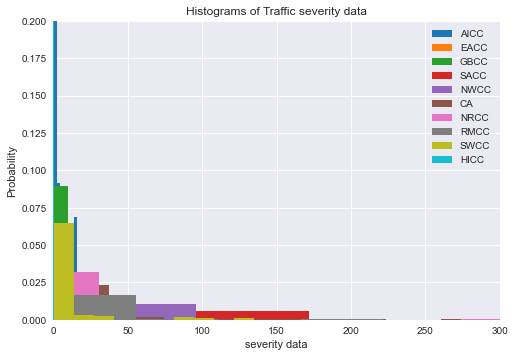

C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


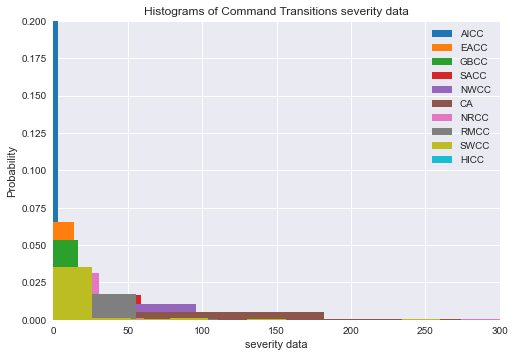

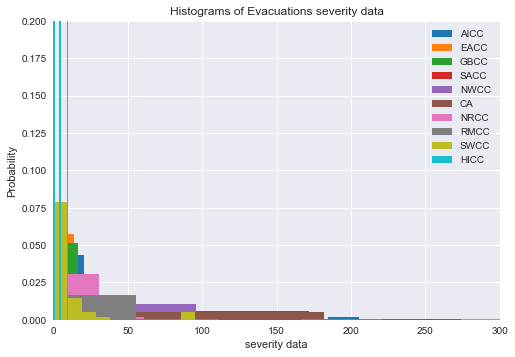

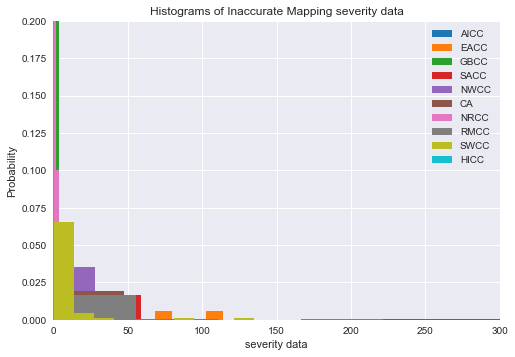

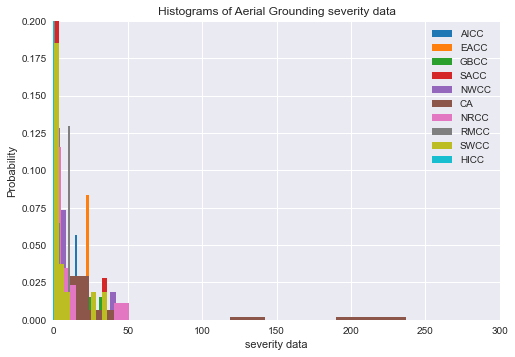

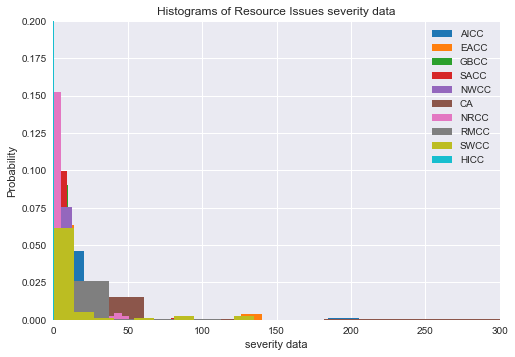

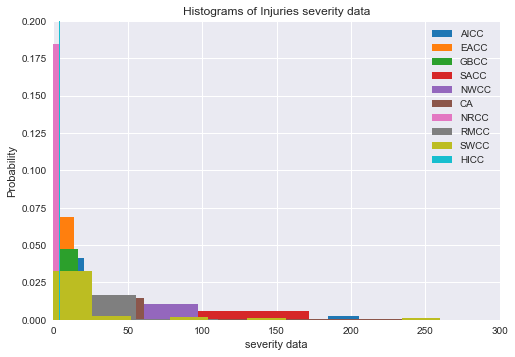

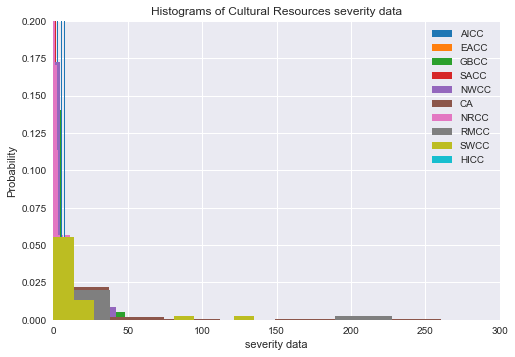

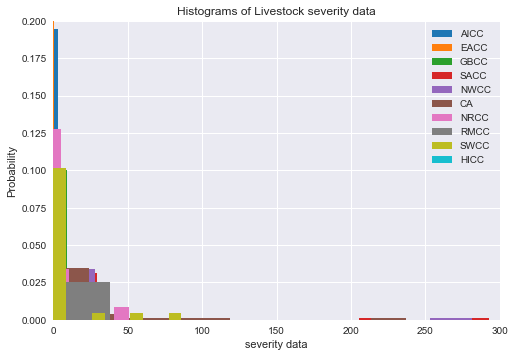

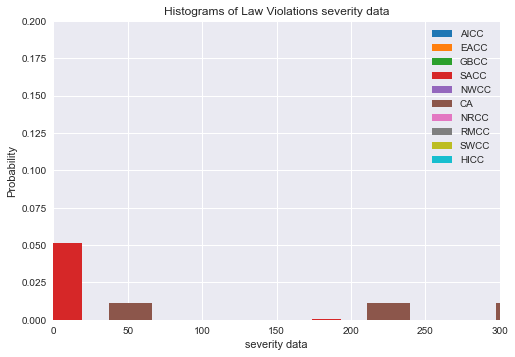

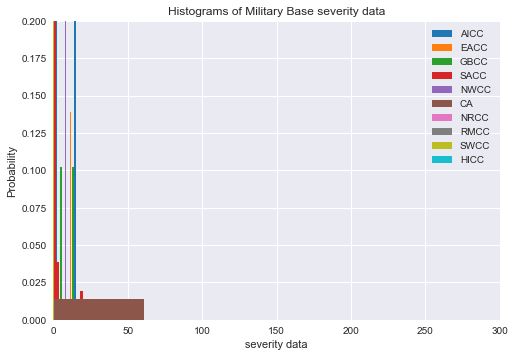

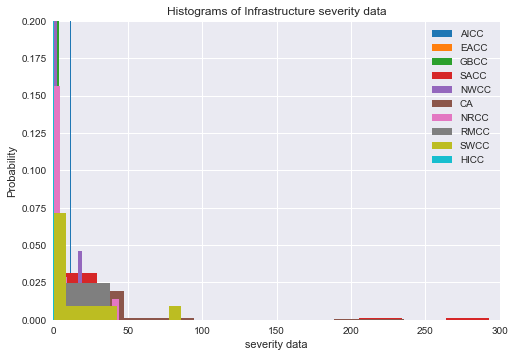

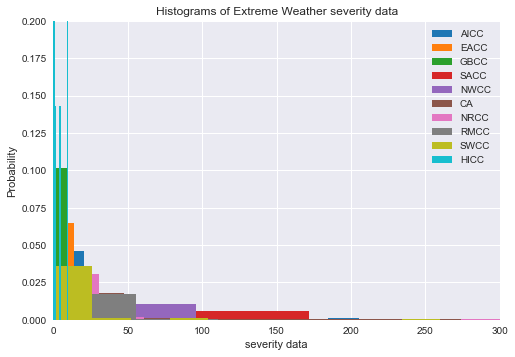

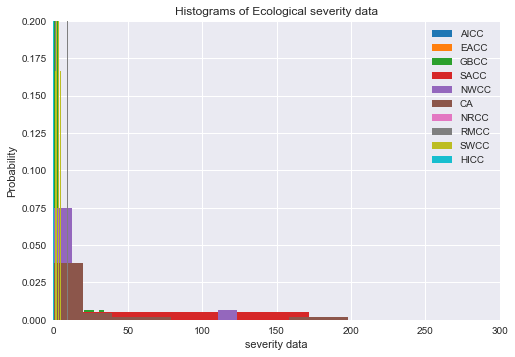

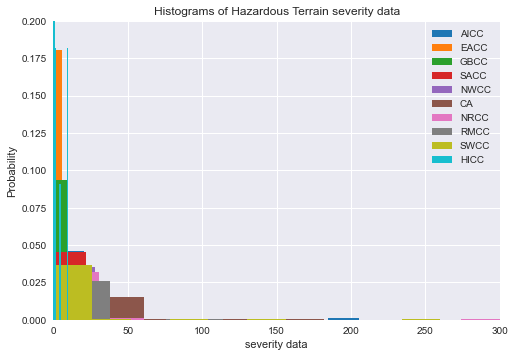

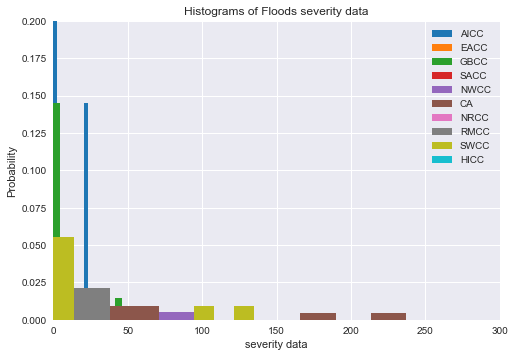

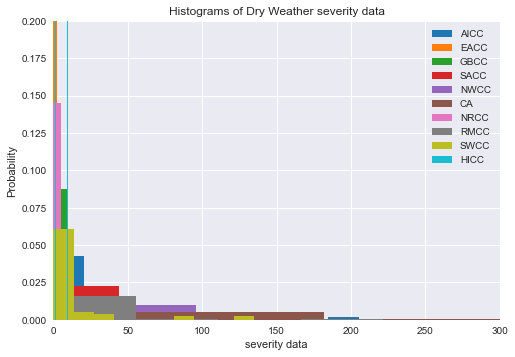

{'Traffic': {'AICC': [23,
   0,
   2,
   0,
   14,
   1,
   3,
   2,
   1,
   1,
   1,
   3,
   3,
   0,
   5,
   0,
   3,
   15,
   16],
  'EACC': [0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   140,
   0,
   0,
   18,
   20,
   0,
   2,
   0,
   3,
   2,
   0,
   0,
   1,
   0,
   0,
   9,
   0,
   7,
   0,
   54,
   0,
   0,
   0,
   4,
   0],
  'GBCC': [0,
   1,
   1,
   1,
   2,
   0,
   4,
   3,
   6,
   3,
   0,
   0,
   1,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   4,
   2,
   2,
   0,
   0,
   2,
   4,
   2,
   1,
   2,
   0,
   0,
   26,
   1,
   0,
   0,
   7,
   1,
   4,
   4,
   1,
   2,
   3,
   18,
   1,
   0,
   0,
   19,
   2,
   0,
   17,
   0,
   1,
   0,
   10,
   0,
   22,
   4,
   1,
   1,
   0,
   17,
   3,
   0,
   0,
   1,
   3,
   27,
   1,
   0,
   9,
   0,
   23,
   0,
   22,
   19,
   0,
   0,
   4,
   6,
   1,
   0,
   0,
   1,
   4,
   2,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   16,
   0,
   0,
   1,
   0,
   2,
   1,


In [18]:
regional_hazard_histograms(regional_data, 'severity data', xmax_val=300, xmin_val=0, ymax_val=0.2, ymin_val=0)

In [19]:
regions_missing_hazards = {}
for hazard in hazards:
    regions_missing_hazards[hazard.replace(" ", "_")] = []
    for region in regional_data:
        haz_freq_region = sum([regional_data[region]['frequency'][hazard.replace("_", " ")][year] for year in regional_data[region]['frequency'][hazard.replace("_", " ")]])
        if haz_freq_region == 0:
            regions_missing_hazards[hazard.replace(" ", "_")].append(region)
#regions_missing_hazards

In [20]:
#1
results_data = {"Hazard Main Effect":[], "Region Main Effect":[], "Hazard X Region Interaction":[]}
for hazard in hazards:
    #print(hazard)
    temp_df = incident_summary_df.loc[~incident_summary_df['Incident_region'].isin(regions_missing_hazards[hazard.replace(" ", "_")])].reset_index(drop=True)
    aov = pg.anova(dv='Severity', between=[str(hazard.replace(" ", "_")), 'Incident_region'], ss_type=3, data=temp_df).round(3)
    results_data["Hazard Main Effect"].append(aov.iloc[1]['p-unc'])
    results_data["Region Main Effect"].append(aov.iloc[0]['p-unc'])
    results_data["Hazard X Region Interaction"].append(aov.iloc[2]['p-unc'])
results_df = pd.DataFrame(results_data, index=hazards)
results_df

C:\Users\srandrad\Anaconda3\lib\site-packages\patsy\constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping


,Hazard Main Effect,Region Main Effect,Hazard X Region Interaction
Traffic,0.000,0.000,0.009
Command Transitions,0.000,0.000,0.000
Evacuations,0.000,0.000,0.000
Inaccurate Mapping,0.000,0.019,0.008
Aerial Grounding,0.008,0.276,0.505
Resource Issues,0.000,0.132,0.014
Injuries,0.000,0.000,0.023
Cultural Resources,0.000,0.001,0.000
Livestock,0.015,0.073,0.582
Law Violations,0.000,0.000,0.000


#1 shows the difference in severity accross regions depends on the hazard. Specifically we see that the severity of all hazards varies by region, except for hazardous terrain, infrastructure, livestock, and aerial groundings.

In [21]:
#2
incident_summary_df.anova(dv='Severity', between='Incident_region', ss_type=3).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,Incident_region,9,9855,7.438,0.0,0.007


In [22]:
post_hoc = pg.pairwise_ttests(dv='Severity', between='Incident_region', data=incident_summary_df).round(3)
post_hoc = post_hoc.loc[post_hoc['p-unc']<0.05].reset_index(drop=True)
post_hoc

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Incident_region,AICC,CA,False,True,-4.057,1366.755,two-sided,0.000,246.032,-0.144
1,Incident_region,CA,EACC,False,True,4.594,1199.902,two-sided,0.000,1823.742,0.173
2,Incident_region,CA,GBCC,False,True,4.696,1157.384,two-sided,0.000,2501.662,0.205
3,Incident_region,CA,HICC,False,True,4.589,698.542,two-sided,0.000,2908.058,0.146
4,Incident_region,CA,NRCC,False,True,4.262,1308.217,two-sided,0.000,443.547,0.160
5,Incident_region,CA,NWCC,False,True,2.861,1782.739,two-sided,0.004,3.157,0.123
6,Incident_region,CA,RMCC,False,True,3.154,1678.325,two-sided,0.002,7.26,0.129
7,Incident_region,CA,SACC,False,True,4.181,1311.356,two-sided,0.000,226.451,0.197
8,Incident_region,CA,SWCC,False,True,4.296,1258.440,two-sided,0.000,472.822,0.169
9,Incident_region,GBCC,RMCC,False,True,-2.031,808.186,two-sided,0.043,0.398,-0.119


#2 shows there is a difference in severity across regions -- post hoc testing tells us more about the nature of this difference. Specifically we see that the severity of fires in california is significantly greater than the severity of all other regions. We also see that the Rocky Mountain Region (RMCC) has a greater severity than the grand basin region.

### OTTO 
#3

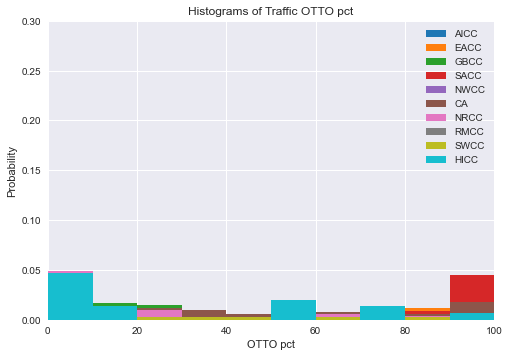

C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


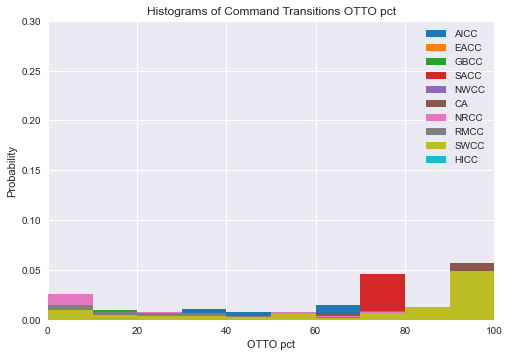

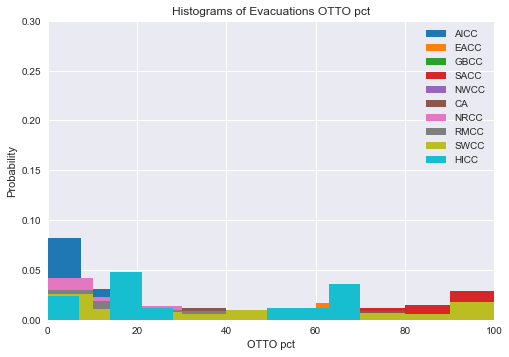

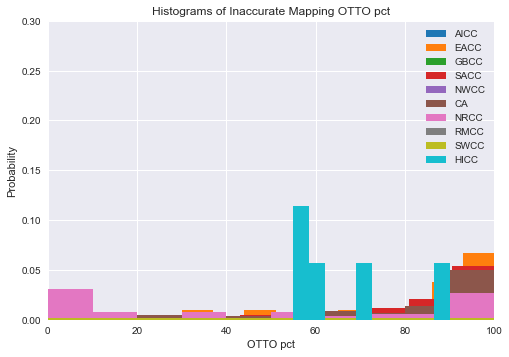

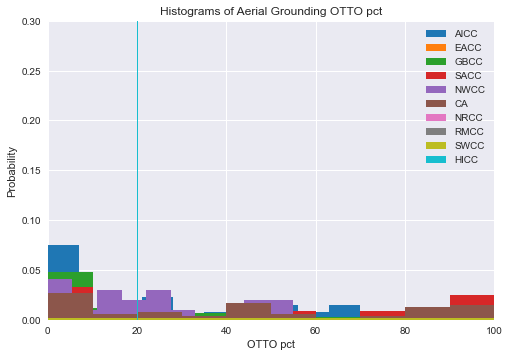

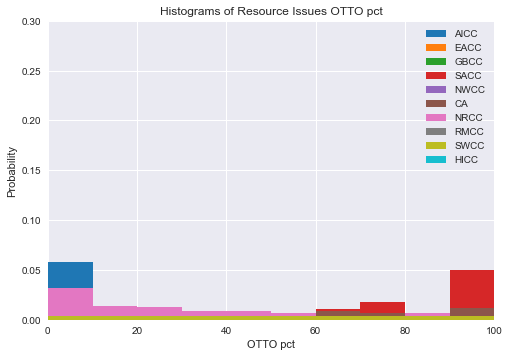

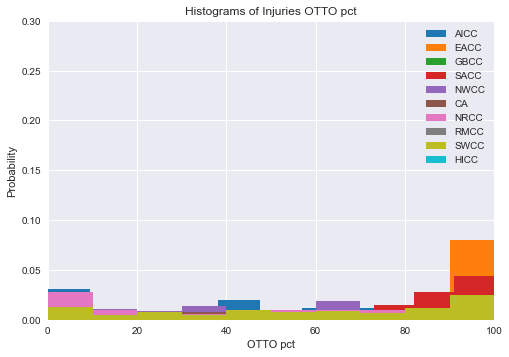

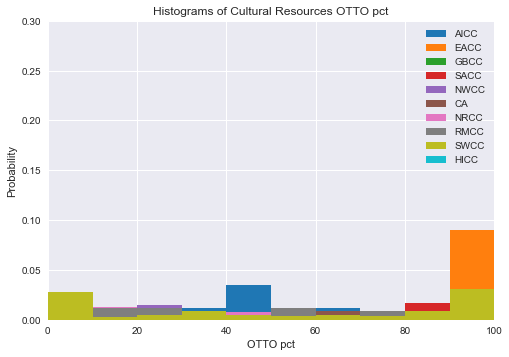

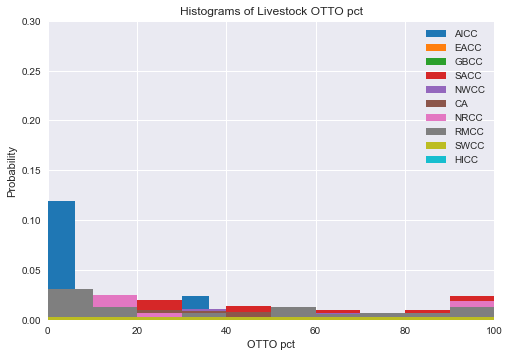

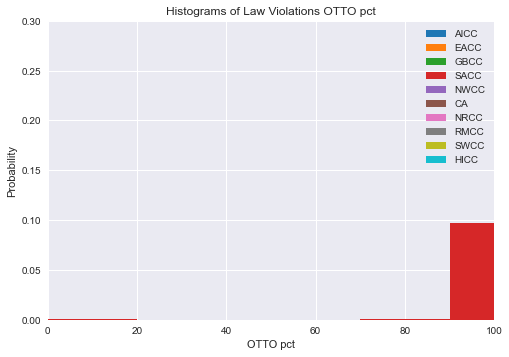

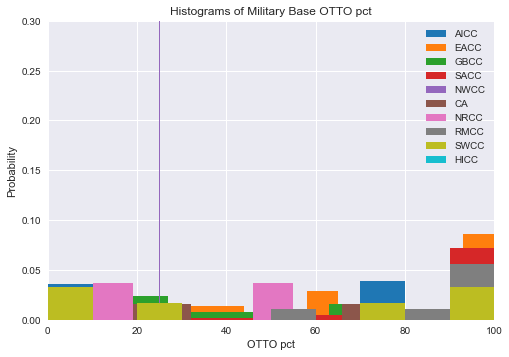

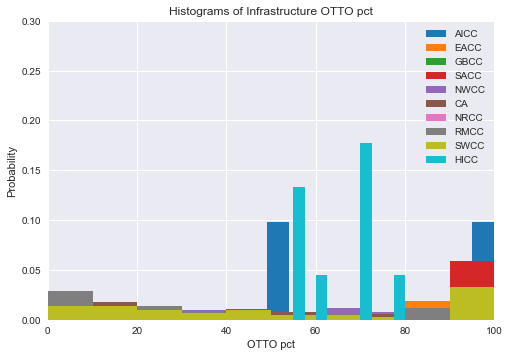

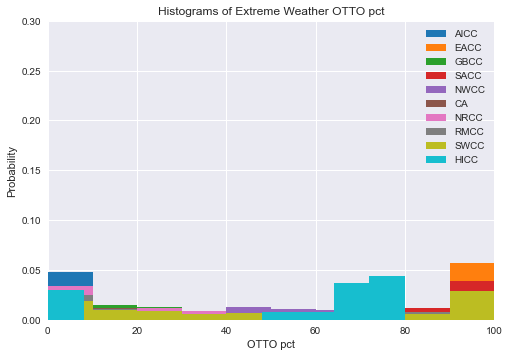

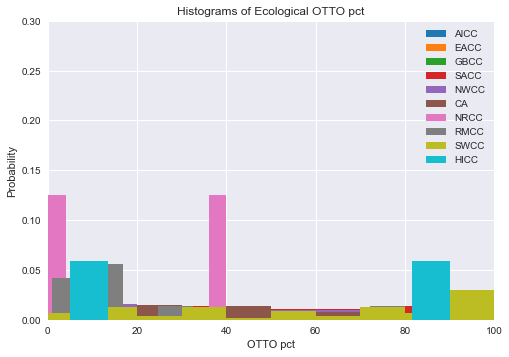

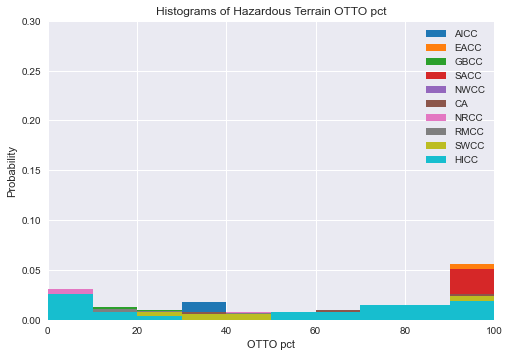

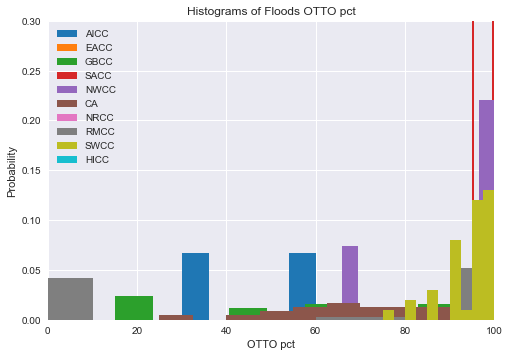

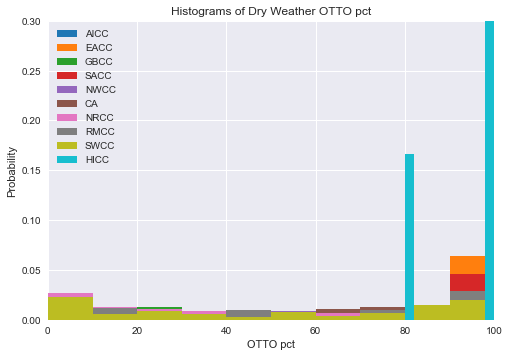

In [23]:
hazard_OTTO_dict = regional_hazard_histograms(regional_data, 'OTTO pct')

In [24]:
hazard_otto_dfs = {}
for hazard in hazard_OTTO_dict:
    regions = []
    ottos = []
    for region in hazard_OTTO_dict[hazard]:
        for otto in hazard_OTTO_dict[hazard][region]:
            regions.append(region)
            ottos.append(otto)
    hazard_otto_dfs[hazard] = pd.DataFrame({'region': regions,
                                           'otto': ottos})
OTTO_anova_results = {"hazard":[], 'pval':[]}
for hazard in hazard_otto_dfs:
    
    #print(hazard)
    aov= pg.anova(dv='otto', between=['region'], ss_type=3, data=hazard_otto_dfs[hazard]).round(3)
    OTTO_anova_results['hazard'].append(hazard)
    OTTO_anova_results['pval'].append(aov.iloc[0]['p-unc'])
    
results_df = pd.DataFrame(OTTO_anova_results)
results_df   

,hazard,pval
0,Traffic,0.000
1,Command Transitions,0.000
2,Evacuations,0.000
3,Inaccurate Mapping,0.146
4,Aerial Grounding,0.010
5,Resource Issues,0.000
6,Injuries,0.719
7,Cultural Resources,0.176
8,Livestock,0.000
9,Law Violations,0.707


#3 results indicate region influences the OTTO of all hazards except inaccurate mapping, injuries, cultural resouces, and law violations

## Chi-Squared test

For each hazard, is there a significant different in hazard frequency across regions
- null hypothesis: hazards occur at the same frequency across regions (p>0.05)
- alternate hypothesis: hazards occur at different frequencies across regions (p<0.05)
target = hazard occurs or not
X = region

In [25]:
p_vals = []
indices = []
for hazard in hazards:
    expected, observed, stats = pg.chi2_independence(preprocessed_df, x='Incident_region', y=hazard.replace(" ", "_"))
    indices.append(hazard)
    pval = stats.iloc[1]['pval'].round(3)
    p_vals.append(stats.iloc[0]['pval'].round(3))

C:\Users\srandrad\Anaconda3\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
C:\Users\srandrad\Anaconda3\lib\site-packages\scipy\stats\stats.py:5991: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\srandrad\Anaconda3\lib\site-packages\scipy\stats\stats.py:5991: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\srandrad\Anaconda3\lib\site-packages\scipy\stats\stats.py:5988: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)
C:\Users\srandrad\Anaconda3\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
C:\Users\srandrad\Anaconda3\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count o

In [26]:
chi_squared_df = pd.DataFrame({"chi-squared pval": p_vals}, index = indices)
chi_squared_df

,chi-squared pval
Traffic,0.0
Command Transitions,0.0
Evacuations,0.0
Inaccurate Mapping,0.0
Aerial Grounding,0.0
Resource Issues,0.0
Injuries,0.0
Cultural Resources,0.0
Livestock,0.0
Law Violations,0.0


The chi-squared test confirms region is a good predictor for hazard occurrence. Specifically, it tells us there is a statistically significant difference in hazard occurrence accross regions